In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os

In [2]:
df = pd.read_csv("C:/Users/Savri/Desktop/MSc Part 1/Datasets/loans_income.csv")
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [3]:
loans_income = np.array(pd.read_csv("C:/Users/Savri/Desktop/MSc Part 1/Datasets/loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [4]:
loans_income = np.array([item for sublist in loans_income for item in sublist])

In [5]:
def bootstrap(l,R):
    n = len(loans_income)
    # Number of Bootstrap Samples
    means_of_boot_samples = []
    for reps in range(R):
        #Steps 1,2
        boot_sample = np.random.choice(loans_income, size = n)
        #Step 3
        means_of_boot_samples.append(round(np.mean(boot_sample), 3))
    return means_of_boot_samples

bootstrap(loans_income, 5)

[68760.42, 68819.456, 68660.209, 68979.844, 68847.899]

In [6]:
np.std(bootstrap(loans_income, 100))

156.6601413388686

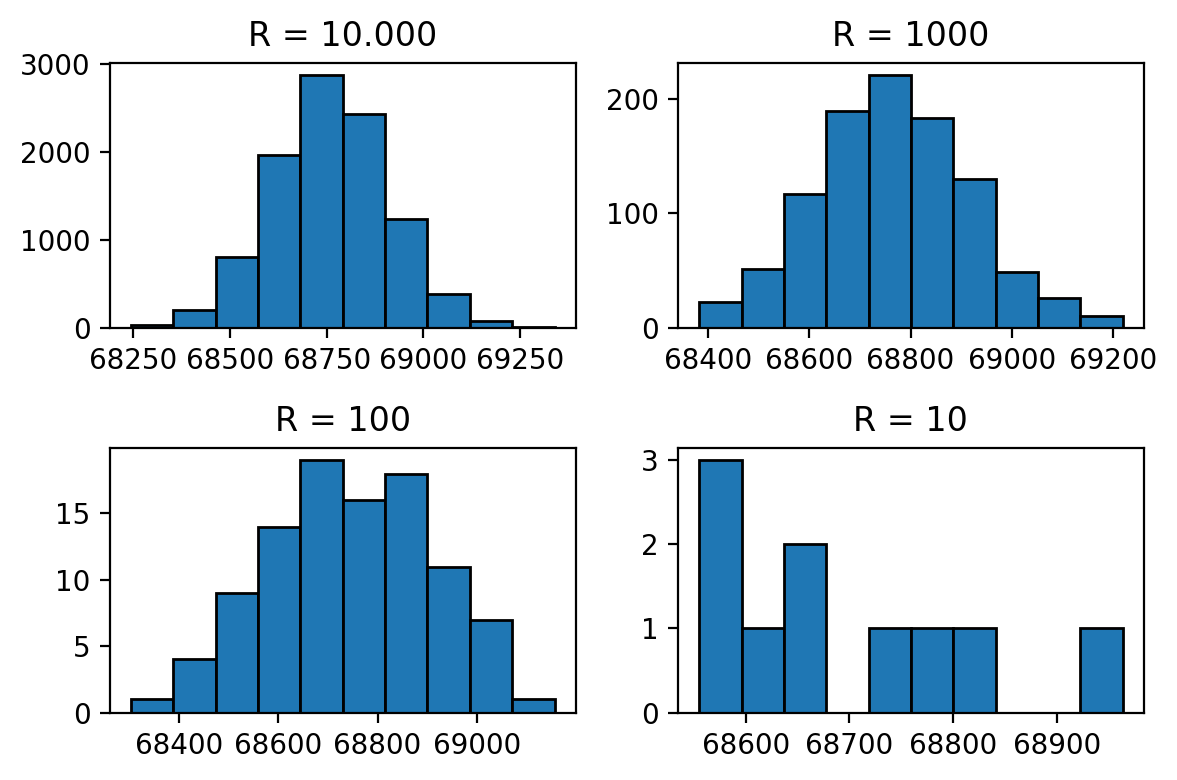

In [7]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title("R = 10.000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

In [8]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data, 2.5), np.percentile(data, 95)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ", upper_lim)

Lower Limit:  68473.0121
Upper Limit:  69006.65095


C:\Users\Savri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


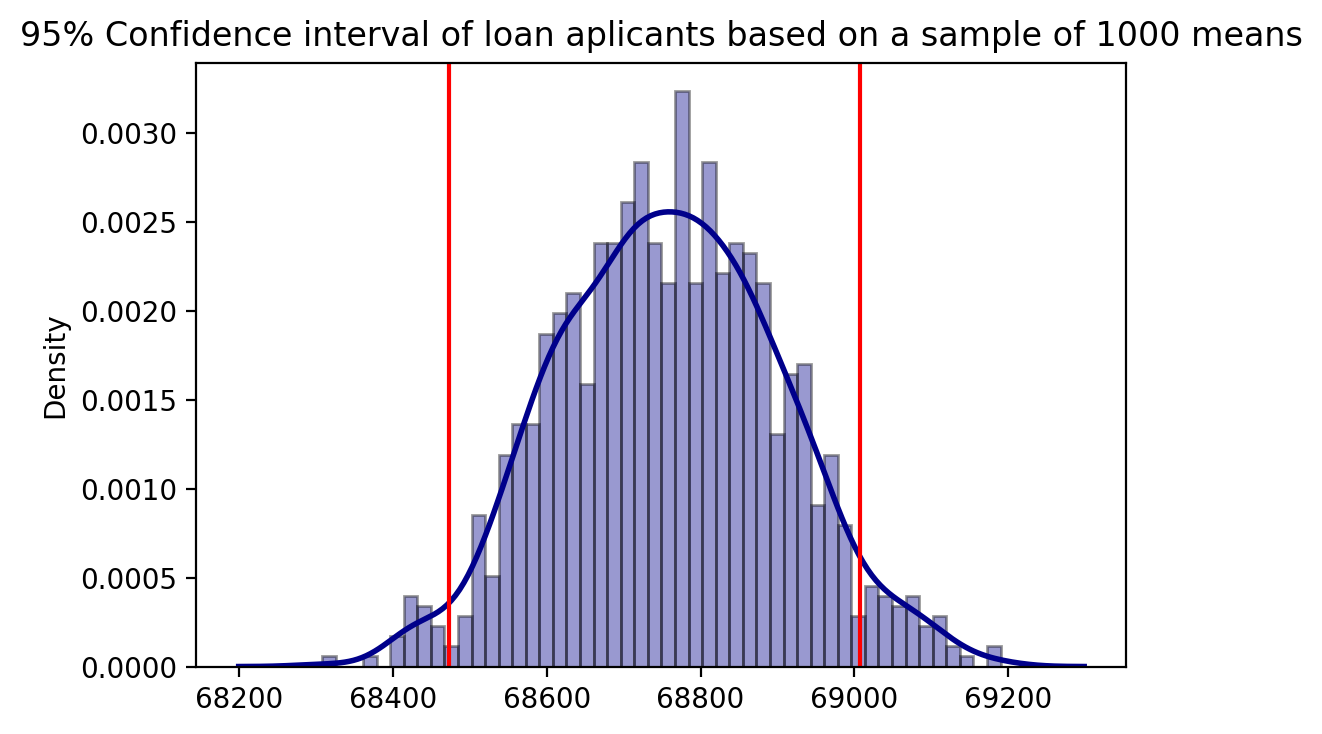

In [9]:
plt.figure(dpi = 200)
plt.title("95% Confidence interval of loan aplicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist=True, kde=True, 
             color = 'darkblue', bins = 50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')